In [ ]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.applications import ResNet50, DenseNet201
from keras.applications import resnet, densenet

import numpy as np
import matplotlib.pyplot as plt

import cv2
import os
import pandas as pd

In [ ]:
train_path = "/content/drive/MyDrive/Data/train"
valid_path = "/content/drive/MyDrive/Data/valid"
test_path = "/content/drive/MyDrive/Data/test"

In [ ]:
image_shape = (305,430,3)
N_CLASSES = 4
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (305,430),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
test_generator[1]

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.00392157, 0.00392157, 0.00392157],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']


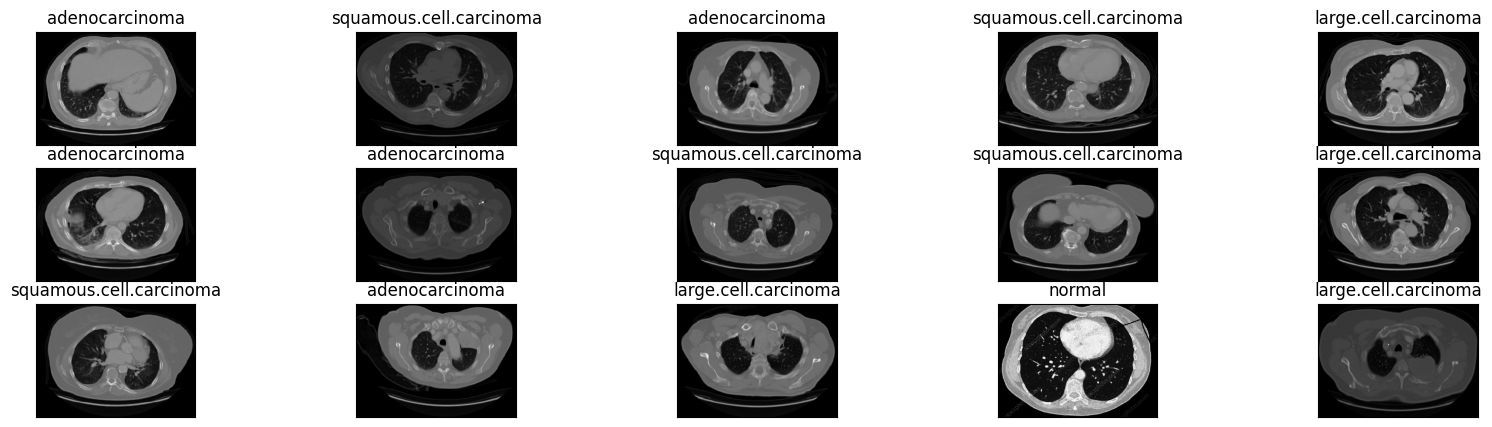

In [ ]:
class_names=list(test_generator.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]
for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.title(class_names[np.argmax(label_batch[i])])

In [ ]:
first_model = Sequential([
  Conv2D(8, 2, padding='same', activation='relu', input_shape = image_shape),
  MaxPooling2D(2),
  Conv2D(16, 2, padding='same', activation='relu'),
  MaxPooling2D(2),
#classification
  Dropout(0.4),
  Flatten(),
  Dense(256, activation='relu'),
  Dropout(0.4),
  Dense(4, activation='softmax')
])
first_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 305, 430, 8)       104       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 152, 215, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 152, 215, 16)      528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 76, 107, 16)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 76, 107, 16)       0         
                                                                 
 flatten (Flatten)           (None, 130112)            0

In [ ]:
checkpointer = ModelCheckpoint('chestmodel.hdf5',verbose=1, save_best_only= True)
early_stopping = EarlyStopping(monitor= 'val_loss', patience= 10)
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)

first_model.compile(loss= 'categorical_crossentropy', optimizer= optimizer, metrics=['acc'])
history = first_model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 80,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping]
                    )

Epoch 1/80
20/20 [==============================] - ETA: 0s - loss: 1.3541 - acc: 0.3638 
Epoch 1: val_loss improved from inf to 1.31756, saving model to chestmodel.hdf5
20/20 [==============================] - 395s 19s/step - loss: 1.3541 - acc: 0.3638 - val_loss: 1.3176 - val_acc: 0.4583
Epoch 2/80
20/20 [==============================] - ETA: 0s - loss: 1.1587 - acc: 0.4682
Epoch 2: val_loss improved from 1.31756 to 1.26844, saving model to chestmodel.hdf5
20/20 [==============================] - 9s 468ms/step - loss: 1.1587 - acc: 0.4682 - val_loss: 1.2684 - val_acc: 0.4167
Epoch 3/80
20/20 [==============================] - ETA: 0s - loss: 1.1033 - acc: 0.5171
Epoch 3: val_loss improved from 1.26844 to 1.18799, saving model to chestmodel.hdf5
20/20 [==============================] - 9s 444ms/step - loss: 1.1033 - acc: 0.5171 - val_loss: 1.1880 - val_acc: 0.4861
Epoch 4/80
20/20 [==============================] - ETA: 0s - loss: 1.0345 - acc: 0.5530
Epoch 4: val_loss improved from 

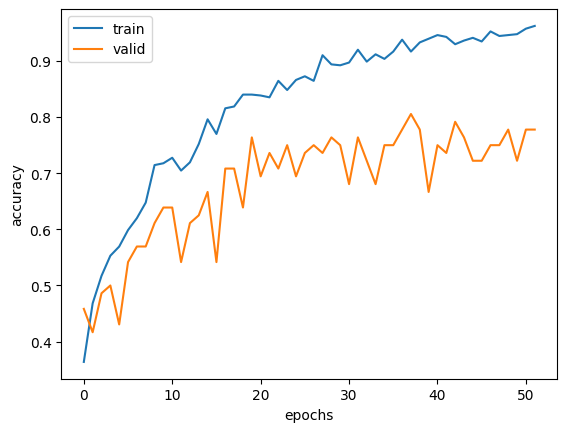

In [ ]:
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
result = first_model.evaluate(test_generator)


10/10 [==============================] - 78s 9s/step - loss: 1.1357 - acc: 0.5810


In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))

# make all layers except conv5 layers not trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_model = Sequential()
resnet_model.add(res_model)
resnet_model.add(Dropout(0.4))
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.4))
resnet_model.add(Dense(N_CLASSES, activation='softmax'))
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 4)                 8196      
                                                      

In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)
resnet_model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])


In [ ]:
checkpointer = ModelCheckpoint(filepath='./finalmodel-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [ ]:
history_res = resnet_model.fit(train_generator,
                            steps_per_epoch = 20,
                            epochs = 120,
                            verbose = 1,
                            validation_data = valid_generator,
                            callbacks = [checkpointer, early_stopping]
                            )

Epoch 1/120
20/20 [==============================] - ETA: 0s - loss: 1.8024 - acc: 0.3638
Epoch 1: val_loss improved from inf to 1.92340, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 27s 880ms/step - loss: 1.8024 - acc: 0.3638 - val_loss: 1.9234 - val_acc: 0.2083
Epoch 2/120
20/20 [==============================] - ETA: 0s - loss: 1.3639 - acc: 0.5041
Epoch 2: val_loss improved from 1.92340 to 1.61878, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 13s 653ms/step - loss: 1.3639 - acc: 0.5041 - val_loss: 1.6188 - val_acc: 0.2500
Epoch 3/120
20/20 [==============================] - ETA: 0s - loss: 1.1053 - acc: 0.6085
Epoch 3: val_loss improved from 1.61878 to 1.37202, saving model to ./finalmodel-ResNet50.hdf5
20/20 [==============================] - 13s 640ms/step - loss: 1.1053 - acc: 0.6085 - val_loss: 1.3720 - val_acc: 0.4167
Epoch 4/120
20/20 [==============================] - ETA: 0s - loss: 0.9497 - acc: 

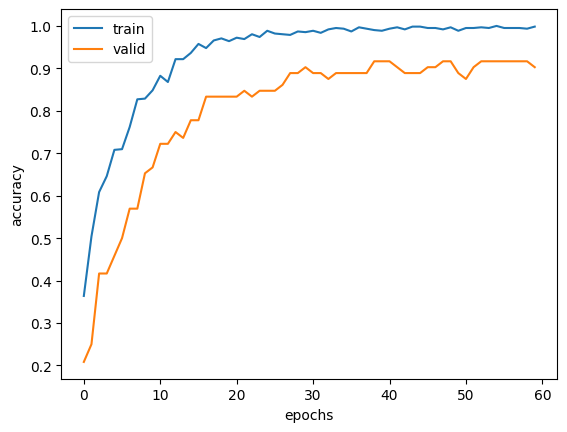

In [ ]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'valid')

plt.legend(loc = 'upper left')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
result = resnet_model.evaluate(test_generator)

10/10 [==============================] - 8s 823ms/step - loss: 0.4130 - acc: 0.8952


In [ ]:
from keras.models import load_model
resnet50_model = load_model('finalmodel-ResNet50.hdf5')

In [ ]:
paths = ["/content/drive/MyDrive/Data/test/adenocarcinoma/", "/content/drive/MyDrive/Data/test/large.cell.carcinoma/", "/content/drive/MyDrive/Data/test/normal/", "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma/"]
results = {"adeno":{0:0, 1:0, 2:0, 3:0},
            "large":{0:0, 1:0, 2:0, 3:0},
            "normal":{0:0, 1:0, 2:0, 3:0},
            "squamous":{0:0, 1:0, 2:0, 3:0}}

for path, key in zip(paths, results.keys()):

    for file in os.listdir(path):
        img = tf.keras.utils.load_img(
            (path + file), target_size=(460, 460)
        )
        img_array = tf.keras.utils.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0)
        prediction = resnet50_model.predict(img_array, verbose=0)
        results[key][np.argmax(prediction)] = results.get(key).get(np.argmax(prediction),0) + 1

results

{'adeno': {0: 105, 1: 6, 2: 0, 3: 9},
 'large': {0: 7, 1: 43, 2: 0, 3: 1},
 'normal': {0: 0, 1: 0, 2: 54, 3: 0},
 'squamous': {0: 12, 1: 1, 2: 0, 3: 77}}

In [ ]:
df = pd.DataFrame(results)

print("Overall accuracy is : {:.2f}%\n".format((df["adeno"][0] + df["large"][1] + df["normal"][2] + df["squamous"][3]) / 315 * 100))

print("Adeno cancer detection accuracy is : {:.2f}%".format(df["adeno"][0] / df["adeno"].sum() * 100))
print("Large cell cancer detection accuracy is : {:.2f}%".format(df["large"][1] / df["large"].sum() * 100))
print("Normal chest detection accuracy is : {:.2f}%".format(df["normal"][2] / df["normal"].sum() * 100))
print("Squamous cell cancer detection accuracy is : {:.2f}%".format(df["squamous"][3] / df["squamous"].sum() * 100))

print("\nConfusion Matrix :")
df.transpose()

Overall accuracy is : 88.57%

Adeno cancer detection accuracy is : 87.50%
Large cell cancer detection accuracy is : 84.31%
Normal chest detection accuracy is : 100.00%
Squamous cell cancer detection accuracy is : 85.56%

Confusion Matrix :


,0,1,2,3
adeno,105,6,0,9
large,7,43,0,1
normal,0,0,54,0
squamous,12,1,0,77


In [ ]:
img_path = "/content/drive/MyDrive/Data/test/adenocarcinoma/000109 (2).png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to adenocarcinoma with a 97.12 percent confidence.


In [ ]:
img_path = "/content/drive/MyDrive/Data/test/normal/11 (2).png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 0s 25ms/step
This image most likely belongs to normal with a 100.00 percent confidence.


In [ ]:
img_path = "/content/drive/MyDrive/Data/test/squamous.cell.carcinoma/000120 (5).png"

class_names=list(test_generator.class_indices.keys())

img = tf.keras.utils.load_img(img_path, target_size=(460, 460))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

prediction = resnet50_model.predict(img_array)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(prediction)], 100 * np.max(prediction))
)

1/1 [==============================] - 0s 27ms/step
This image most likely belongs to squamous.cell.carcinoma with a 99.92 percent confidence.
